<a href="https://colab.research.google.com/github/santipop1/AdvancedIA/blob/main/SegundoBloque/Notebook1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polinomial Models

In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit

In [10]:
# Sample dataset
data = {
    'Study_Hours': [1,2,3,4,5,6,7,8,9,10],
    'Exam_Score': [50,65,75,80,85,88,89,88,85,80]
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)

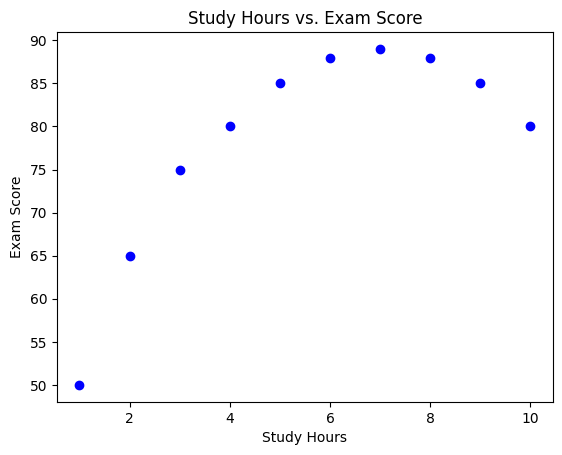

In [11]:
# Extract the features (Study_Hours) and target (Exam_Score)
X = df['Study_Hours'].values.reshape(-1, 1)
y = df['Exam_Score']

# Visualize the data
plt.scatter(X, y, color='blue')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.title('Study Hours vs. Exam Score')
plt.show()


In [12]:
# Fit linear regression for comparison
model = LinearRegression()
model.fit(X, y)
y_pred_linear = model.predict(X)


# Fit polynomial regression
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
y_pred = poly_model.predict(X_poly)


Mean Squared Error (Linear Regression): 61.369696969696975
Mean Squared Error (Polynomial Regression): 1.124242424242421


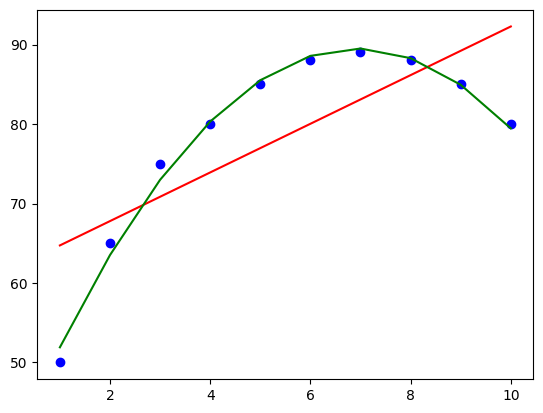

In [13]:
# Plot results
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred_linear, color='red', label='Linear Regression')
plt.plot(X, y_pred, color='green', label='Polynomial Regression')

# Evaluate the models
mse_linear = mean_squared_error(y, y_pred_linear)
mse_poly = mean_squared_error(y, y_pred)

print(f"Mean Squared Error (Linear Regression): {mse_linear}")
print(f"Mean Squared Error (Polynomial Regression): {mse_poly}")



# Exponential regression

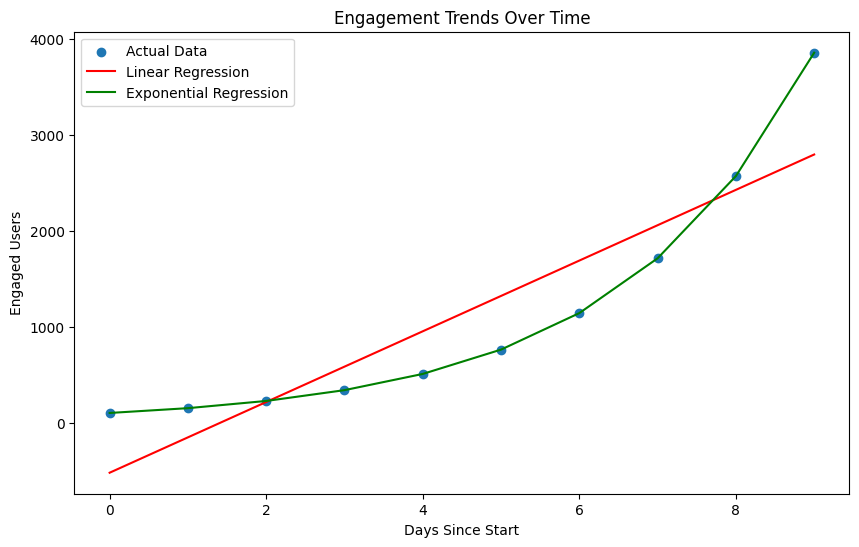

Mean Squared Error (Linear Regression): 261371.25333333333
Mean Squared Error (Exponential Regression): 0.3845637617657058


In [14]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Sample dataset
data = {
    'Date': pd.date_range(start='2022-01-01', periods=10),
    'Engaged_Users': [100,150,225,338,507,761,1142,1713,2570,3855]
}

# Create a DataFrame from the dataset
df = pd.DataFrame(data)


# Extract the features (Date) and target (Engaged_Users)
# Convert dates to numerical representation (e.g., days since the first date)
df['Date_Numerical'] = (df['Date'] - df['Date'].min()).dt.days
X = df['Date_Numerical'].values.reshape(-1, 1)
y = df['Engaged_Users'].values

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, marker='o', linestyle='-', label='Actual Data')
plt.xlabel('Days Since Start')
plt.ylabel('Engaged Users')
plt.title('Engagement Trends Over Time')


# Fit linear regression for comparison
model = LinearRegression()
model.fit(X, y)
y_pred_linear = model.predict(X)


# Fit exponential regression
# Use log of y for linear fitting
exp_model_params = np.polyfit(X.flatten(), np.log(y), 1)
y_pred_exp = np.exp(np.polyval(exp_model_params, X.flatten()))


#plot the comparison
plt.plot(X, y_pred_linear, color='red', label='Linear Regression')
plt.plot(X, y_pred_exp, color='green', label='Exponential Regression')
plt.legend()
plt.show()

# Evaluate the models
mse_linear = mean_squared_error(y, y_pred_linear)
mse_exp = mean_squared_error(y, y_pred_exp)

print(f"Mean Squared Error (Linear Regression): {mse_linear}")
print(f"Mean Squared Error (Exponential Regression): {mse_exp}")

# Power models

Model: Likes = 0.0326 * Followers^2.3781


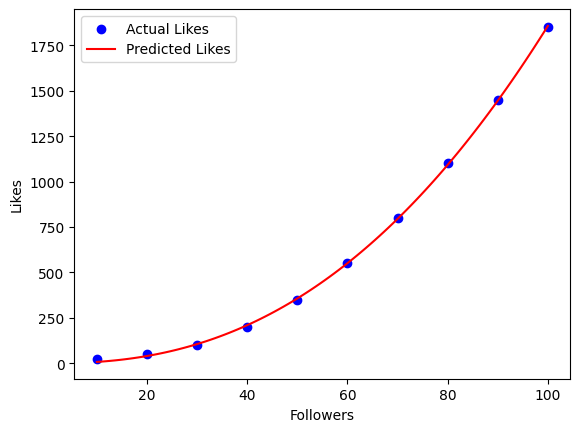

In [15]:
# Import libraries

# Create a DataFrame with the sample data
data = {
    'User_ID': range(1, 11),
    'Followers': np.arange(10, 110, 10),
    'Likes': [25,50,100,200,350,550,800,1100,1450,1850],
    'Shares': [5,10,20,40,70,110,160,220,290,370],
    'Comments': [2,4,8,16,28,44,64,88,116,148]
}
df = pd.DataFrame(data)

# Perform power regression for Likes as an example
def power_func(x, a, b):
    return a * np.power(x, b)

xdata = df['Followers'].values
ydata = df['Likes'].values

params, _ = curve_fit(power_func, xdata, ydata)
a, b = params
print(f"Model: Likes = {a:.4f} * Followers^{b:.4f}")

# Generate a range of Followers values for the fitted curve
x_fit = np.linspace(min(xdata), max(xdata), 100)

# Calculate the predicted Likes using the fitted parameters
y_fit = power_func(x_fit, a, b)

# Create a plot to visualize the relationship
plt.scatter(xdata, ydata, color="blue", label="Actual Likes")
plt.plot(x_fit, y_fit, color="red", label="Predicted Likes")
plt.xlabel("Followers")
plt.ylabel("Likes")
plt.legend()
plt.show()
